# Weight Initialization Techniques in Neural Networks

Proper weight initialization is crucial for the effective training of neural networks. Poor initialization can lead to problems like vanishing or exploding gradients, making the network slow to converge or fail to learn. Below is an overview of commonly used weight initialization techniques, including their theoretical basis, formulas, and practical implications.

---

## 1. Zero Initialization

**Theory:**

- All weights are initialized to zero.
- This approach results in symmetric updates, where neurons in each layer learn identical features, rendering the network ineffective.
- Not used in practice.

**Formula:**

$$ W = 0 $$

**Problem:**

- No symmetry breaking among neurons.

---

## 2. Random Initialization

**Theory:**

- Weights are initialized randomly, usually from a uniform or normal distribution.
- Helps break symmetry and allows neurons to learn different features.
- However, if the variance of the weights is too large, it can cause gradients to explode, and if too small, it can cause vanishing gradients.

**Formula:**

$$ W \sim U(a, b) \quad \text{or} \quad W \sim N(\mu, \sigma^2) $$

where:

- \( U(a, b) \) is a uniform distribution.
- \( N(\mu, \sigma^2) \) is a normal distribution.

---

## 3. Xavier Initialization (Glorot Initialization)

**Theory:**

- Designed to maintain the variance of activations across layers, preventing gradients from vanishing or exploding.
- Balances the variance of weights to be proportional to the size of the input and output layers.
- Works well with activation functions like sigmoid and tanh.

**Formulas:**

For a uniform distribution:

$$ W \sim U\left(-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}, \sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}\right) $$

For a normal distribution:

$$ W \sim N\left(0, \frac{2}{n_{\text{in}} + n_{\text{out}}}\right) $$

where:

- \( n_{\text{in}} \): Number of input neurons.
- \( n_{\text{out}} \): Number of output neurons.

---

## 4. He Initialization

**Theory:**

- Proposed to address ReLU activation functions.
- Ensures that the variance of weights is scaled according to the input size, promoting stable gradients.
- Specifically tailored for layers with ReLU or leaky ReLU activations.

**Formulas:**

For a normal distribution:

$$ W \sim N\left(0, \frac{2}{n_{\text{in}}}\right) $$

For a uniform distribution:

$$ W \sim U\left(-\sqrt{\frac{6}{n_{\text{in}}}}, \sqrt{\frac{6}{n_{\text{in}}}}\right) $$

where:

- \( n_{\text{in}} \): Number of input neurons.

---

## 5. LeCun Initialization

**Theory:**

- Specifically designed for activation functions like SELU (Scaled Exponential Linear Units).
- Ensures that activations and gradients are normalized throughout the layers.
- Commonly used in networks with self-normalizing properties.

**Formulas:**

For a normal distribution:

$$ W \sim N\left(0, \frac{1}{n_{\text{in}}}\right) $$

For a uniform distribution:

$$ W \sim U\left(-\sqrt{\frac{3}{n_{\text{in}}}}, \sqrt{\frac{3}{n_{\text{in}}}}\right) $$

---

---

## 6. Layer-Wise Initialization (LSUV)

**Theory:**

- Layer-wise Sequential Unit Variance (LSUV) initialization adjusts weights iteratively to ensure proper variance propagation.
- Combines random initialization with a fine-tuning step to normalize variance.
- Effective for very deep networks.

**Steps:**

1. Start with random initialization (e.g., Xavier or He).
2. Pass random inputs through the network.
3. Adjust weights layer-by-layer to normalize the variance of outputs.

---

## 7. Uniform Initialization

**Theory:**

- A simple and widely used initialization where weights are drawn from a uniform distribution.
- Suitable for general-purpose use but may not be optimal for deeper networks or specific activation functions.

**Formula:**

$$ W \sim U(-a, a) $$

where:

$$ a = \sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}} $$


In [55]:
import pandas as pd
import numpy as np

# Setting the seed for reproducibility
np.random.seed(42)

# Generate a dataset with 100 data points
n_samples = 100

# Input columns - generate random data for two input features
input_col1 = np.random.randn(n_samples)  # Random values from a normal distribution
input_col2 = np.random.rand(n_samples)   # Random values between 0 and 1

# Output column - generate a binary target variable
output_col = (input_col1 + input_col2 > 0).astype(int)  # 1 if sum of inputs is greater than 0, else 0

# Create a DataFrame
df = pd.DataFrame({
    'Input_Column_1': input_col1,
    'Input_Column_2': input_col2,
    'Output': output_col
})
df.head()

,Input_Column_1,Input_Column_2,Output
0,0.496714,0.417411,1
1,-0.138264,0.222108,1
2,0.647689,0.119865,1
3,1.523030,0.337615,1
4,-0.234153,0.942910,1


In [56]:
import matplotlib.pyplot as plt

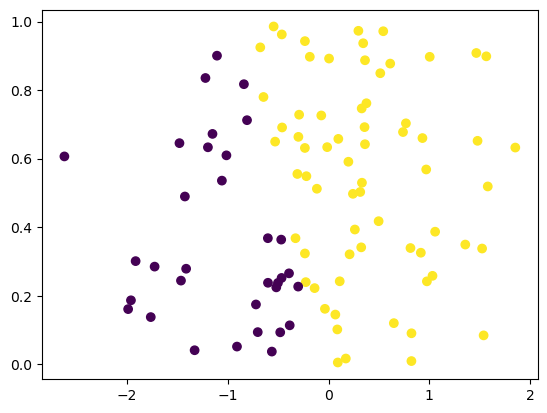

In [57]:
plt.scatter(df['Input_Column_1'],df['Input_Column_2'],c=df['Output'])

In [58]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [59]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])

In [60]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [61]:
from tensorflow.keras.initializers import RandomNormal, GlorotUniform, HeNormal, Zeros

In [62]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2,kernel_initializer=HeNormal()))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Set parameters to 0
model.get_weights()

[array([[ 0.91585016,  0.5483465 , -1.8327932 , -0.47321683, -0.81757194,
          1.4737824 ,  0.56524193,  0.5927287 ,  0.3126835 ,  1.2165519 ],
        [ 1.1739833 ,  1.1748772 ,  0.8254363 , -0.94844246, -0.00636067,
          0.1002716 ,  0.32740274,  1.3065212 , -0.59474915, -0.12873124]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.20956063],
        [ 0.11915821],
        [-0.4098204 ],
        [-0.21503443],
        [-0.10541183],
        [-0.3811707 ],
        [-0.41342747],
        [-0.29575014],
        [-0.4184413 ],
        [ 0.29486686]], dtype=float32),
 array([0.], dtype=float32)]

In [47]:
# initial_weights = model.get_weights()

In [48]:
# initial_weights[0] = np.zeros(model.get_weights()[0].shape)
# initial_weights[1] = np.zeros(model.get_weights()[1].shape)
# initial_weights[2] = np.zeros(model.get_weights()[2].shape)
# initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [49]:
# initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
# initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
# initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
# initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [50]:
# model.set_weights(initial_weights)

In [51]:
model.get_weights()

[array([[ 0.13925299,  1.1990302 ,  0.36693022, -0.14648983,  0.44140092,
         -0.96468294,  2.2494528 , -0.6421311 ,  0.50521576,  0.00257817],
        [-0.44903103, -0.6053469 ,  0.03665183, -0.9408237 , -0.5438582 ,
         -1.2297777 ,  1.3391058 ,  0.10538828,  0.6327019 , -1.4802598 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.20917857],
        [-0.24690276],
        [-0.3226128 ],
        [-0.5635489 ],
        [ 0.5891693 ],
        [-0.6259559 ],
        [ 0.2196554 ],
        [ 0.21002412],
        [-0.12735087],
        [ 0.63409764]], dtype=float32),
 array([0.], dtype=float32)]

In [52]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
history = model.fit(X,y,epochs=20,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 2s 226ms/step - loss: 0.6393 - accuracy: 0.8500 - val_loss: 0.6485 - val_accuracy: 0.9000
Epoch 2/20
3/3 [==============================] - 0s 40ms/step - loss: 0.6352 - accuracy: 0.9000 - val_loss: 0.6442 - val_accuracy: 0.9000
Epoch 3/20
3/3 [==============================] - 0s 40ms/step - loss: 0.6313 - accuracy: 0.9250 - val_loss: 0.6398 - val_accuracy: 0.9000
Epoch 4/20
3/3 [==============================] - 0s 46ms/step - loss: 0.6270 - accuracy: 0.9750 - val_loss: 0.6357 - val_accuracy: 0.9500
Epoch 5/20
3/3 [==============================] - 0s 45ms/step - loss: 0.6232 - accuracy: 0.9625 - val_loss: 0.6316 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 54ms/step - loss: 0.6192 - accuracy: 0.9750 - val_loss: 0.6277 - val_accuracy: 0.9500
Epoch 7/20
3/3 [==============================] - 0s 43ms/step - loss: 0.6152 - accuracy: 0.9625 - val_loss: 0.6238 - val_accuracy: 0.9500
Epoch 8/20
3/3 [==========

In [54]:
model.get_weights()

[array([[ 0.19902061,  1.1433121 ,  0.31040636, -0.20379035,  0.49986887,
         -1.022674  ,  2.306116  , -0.5828961 ,  0.4514145 ,  0.06152751],
        [-0.39410505, -0.65922415, -0.01526212, -0.9917437 , -0.489067  ,
         -1.2774854 ,  1.390652  ,  0.16052681,  0.58424586, -1.426564  ]],
       dtype=float32),
 array([ 0.05124734, -0.05210201, -0.0486849 , -0.04628195,  0.05172454,
        -0.04242011,  0.04853142,  0.0522742 , -0.04483934,  0.04860549],
       dtype=float32),
 array([[ 0.2610697 ],
        [-0.1908597 ],
        [-0.26974258],
        [-0.5235878 ],
        [ 0.64384764],
        [-0.65407276],
        [ 0.27704844],
        [ 0.23850934],
        [-0.07344804],
        [ 0.68078303]], dtype=float32),
 array([0.04923466], dtype=float32)]

9600/9600 [==============================] - 28s 3ms/step


<Axes: >

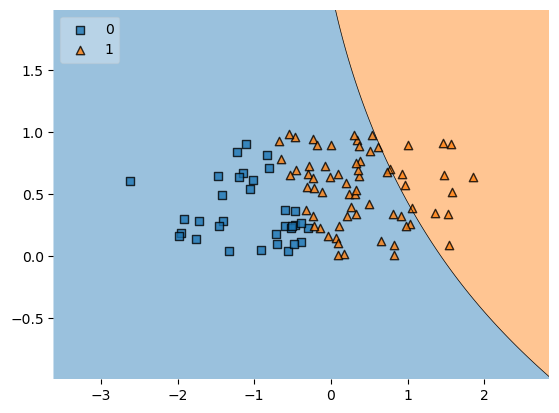

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)